In [21]:

import networkx as nx
import matplotlib.pyplot as plt

def agregar_persona(grafo, persona, padre=None, madre=None, pareja=None):
    grafo.add_node(persona)
    if padre:
        grafo.add_edge(padre, persona)
    if madre:
        grafo.add_edge(madre, persona)
    if pareja:
        grafo.add_edge(persona, pareja)

arbol_genealogico = nx.DiGraph()

# Agregar personas al grafo
agregar_persona(arbol_genealogico, "Agapito")
agregar_persona(arbol_genealogico, "María Garcia")
agregar_persona(arbol_genealogico, "Gerardo Parra", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Alfonso", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Hernando", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Carlos", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Ines", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Elisa", "Agapito", "María Garcia")


agregar_persona(arbol_genealogico, "Luis Carlos", "Carlos", "Lilia")
agregar_persona(arbol_genealogico, "Gerardito", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Raul", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Gladys", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Bertha", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Gustavo", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Olga", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Alvaro", "Gerardo Parra", "Clarisa")

# Agregar y definir parejas en el grafo
agregar_persona(arbol_genealogico, "Clarisa", pareja="Gerardo Parra")
agregar_persona(arbol_genealogico, "Agapito", pareja="María Garcia")
agregar_persona(arbol_genealogico, "Carlos", pareja="Lilia")

# Agregar padres y madres
agregar_persona(arbol_genealogico, "Gerardo Parra", padre="Agapito", madre="María Garcia")
agregar_persona(arbol_genealogico, "Gerardito", padre="Gerardo Parra", madre="Clarisa")
agregar_persona(arbol_genealogico, "Raul", padre="Gerardo Parra", madre="Clarisa")
agregar_persona(arbol_genealogico, "Gladys", padre="Gerardo Parra", madre="Clarisa")
agregar_persona(arbol_genealogico, "Bertha", padre="Gerardo Parra", madre="Clarisa")   
agregar_persona(arbol_genealogico, "Gustavo", padre="Gerardo Parra", madre="Clarisa")
agregar_persona(arbol_genealogico, "Olga", padre="Gerardo Parra", madre="Clarisa")
agregar_persona(arbol_genealogico, "Alvaro", padre="Gerardo Parra", madre="Clarisa")
agregar_persona(arbol_genealogico, "Alfonso", padre="Agapito", madre="María Garcia")
agregar_persona(arbol_genealogico, "Hernando", padre="Agapito", madre="María Garcia")
agregar_persona(arbol_genealogico, "Carlos", padre="Agapito", madre="María Garcia")
agregar_persona(arbol_genealogico, "Ines", padre="Agapito", madre="María Garcia")
agregar_persona(arbol_genealogico, "Elisa", padre="Agapito", madre="María Garcia")
agregar_persona(arbol_genealogico, "Luis Carlos", padre="Carlos", madre="Lilia")

posiciones_manuales = {
    # Nivel 1
    "Agapito": (0, 0),
    "María Garcia": (2, 0),

    # Nivel 2
    "Gerardo Parra": (1, -1.5), "Clarisa": (3,-1.5),
    "Alfonso": (-1, -1),
    "Hernando": (3, -1),
    "Carlos": (5, -1), "Lilia": (7, -1),
    "Ines": (-3, -1),
    "Elisa": (-5, -1),

  # Nivel 3
    "Luis Carlos": (6, -1.5),
    "Gerardito": (-1, -2.5),
    "Gustavo": (1, -2.5),
    "Gladys": (3, -2.5),
    "Bertha": (5, -2.5),
    "Olga": (7, -2.5),
    "Alvaro": (9, -2.5),
    "Raul": (11, -2.5),

}

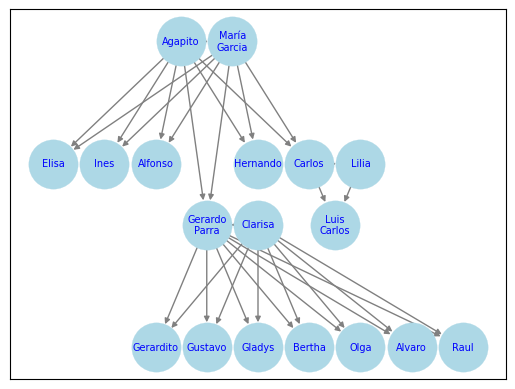

In [22]:
# Obtener nodos de parejas
nodos_parejas = [nodo for nodo, datos in arbol_genealogico.nodes(data=True) if "pareja" in datos]

# Agregar etiquetas con saltos de línea para nodos con nombres largos
etiquetas = {nodo: nodo.replace(" ", "\n") for nodo in arbol_genealogico.nodes}
nx.draw_networkx_labels(arbol_genealogico, pos=posiciones_manuales, labels=etiquetas, font_size=7, font_color='blue')

# Colorear nodos de parejas en otro color
nx.draw_networkx_nodes(arbol_genealogico, pos=posiciones_manuales, nodelist=nodos_parejas, node_color='red')

# Cambiar el color de flecha de las parejas
for edge in arbol_genealogico.edges(data=True):
    if "pareja" in edge[2]:
        nx.draw_networkx_edges(arbol_genealogico, pos=posiciones_manuales, edgelist=[(edge[0], edge[1])], connectionstyle="arc3,rad=0.1", arrowsize=0, arrowstyle="->,head_width=0.5,head_length=0.7", edge_color='red')

# Visualización con posiciones manuales y colores
nx.draw_networkx(arbol_genealogico, pos=posiciones_manuales, with_labels=False, arrowsize=8, labels=etiquetas, node_size=1260, font_size=8, edge_color='gray', linewidths=0.2, node_color='lightblue') #, font_weight='bold'